### COVID-19 Spread Analysis in Germany
This section is related to the last bullet point question in the assignment.

This section uses a separate dataset provided by GoogleCloudPlatform. More info here [open-covid-19.github.io](https://open-covid-19.github.io/explorer/report/?key=DE)


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
google_covid_de = pd.read_csv("covid_germany/de_comp_covid.csv")
google_covid_de.head()

vital_attributes = ["date", "new_confirmed", "new_deceased", "new_persons_fully_vaccinated", "mobility_retail_and_recreation", "mobility_grocery_and_pharmacy", "mobility_parks", "mobility_transit_stations", "mobility_workplaces", "mobility_residential", "testing_policy", "facial_coverings", "vaccination_policy", "average_temperature_celsius"]
google_covid_de.drop(google_covid_de.columns.difference(vital_attributes), axis=1, inplace=True)
google_covid_de.date = pd.to_datetime(google_covid_de.date, infer_datetime_format = True)
google_covid_de.head()

,date,new_confirmed,new_deceased,new_persons_fully_vaccinated,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,testing_policy,facial_coverings,vaccination_policy,average_temperature_celsius
0,2020-01-01,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-0.476190
1,2020-01-02,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-0.444444
2,2020-01-03,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,5.155556
3,2020-01-04,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.855556
4,2020-01-05,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.105556


#### Cleaning and Filling Missing Values

1)  We will select the data starting from February 21th 2020 till May 2nd 2022, as it has almost no missing values.

2) Next, we fill in empty values in `new_persons_fully_vaccinated` and `cumulative_persons_fully_vaccinated` with 0s, since there were no vaccinated people recorded in the beginning of the pandemic.

3) Lastly, we drop incomplete columns, as the number of them is negligible in relation to the whole dataset.

In [19]:
google_covid_de.isnull().sum()

date                                0
new_confirmed                       5
new_deceased                        5
new_persons_fully_vaccinated      371
mobility_retail_and_recreation     50
mobility_grocery_and_pharmacy      50
mobility_parks                     50
mobility_transit_stations          50
mobility_workplaces                50
mobility_residential               50
testing_policy                      6
facial_coverings                    6
vaccination_policy                  6
average_temperature_celsius         9
dtype: int64

In [20]:
google_covid_de['new_persons_fully_vaccinated'] = google_covid_de['new_persons_fully_vaccinated'].fillna(0)
google_covid_de = google_covid_de[51:851]
google_covid_de.isnull().sum()

date                              0
new_confirmed                     0
new_deceased                      0
new_persons_fully_vaccinated      0
mobility_retail_and_recreation    0
mobility_grocery_and_pharmacy     0
mobility_parks                    0
mobility_transit_stations         0
mobility_workplaces               0
mobility_residential              0
testing_policy                    0
facial_coverings                  0
vaccination_policy                0
average_temperature_celsius       1
dtype: int64

In [21]:
google_covid_de = google_covid_de[google_covid_de['average_temperature_celsius'].notna()]
google_covid_de.isnull().sum()

date                              0
new_confirmed                     0
new_deceased                      0
new_persons_fully_vaccinated      0
mobility_retail_and_recreation    0
mobility_grocery_and_pharmacy     0
mobility_parks                    0
mobility_transit_stations         0
mobility_workplaces               0
mobility_residential              0
testing_policy                    0
facial_coverings                  0
vaccination_policy                0
average_temperature_celsius       0
dtype: int64

<AxesSubplot:>

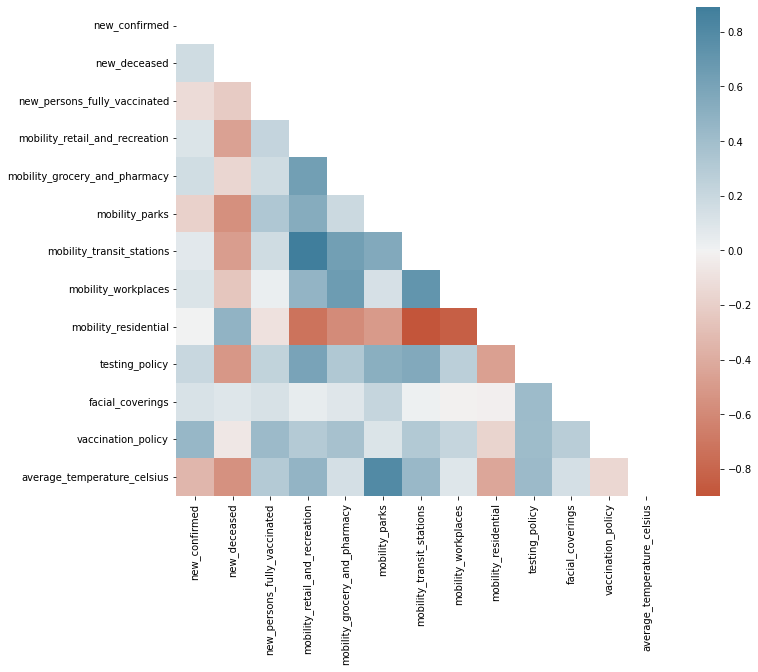

In [22]:
corr = google_covid_de.corr()
f, ax = plt.subplots(figsize=(11,9))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(20, 230, as_cmap=True)
sns.heatmap(corr, cmap=cmap, square=True, mask=mask)

In [23]:

# plt.figure(figsize=(11,9))
# dfm = df.melt("date", var_name='cols', value_name='vals')
# sns.lineplot(x='date', y='vals',hue='cols', data=dfm)

<AxesSubplot:xlabel='date', ylabel='mobility_retail_and_recreation'>

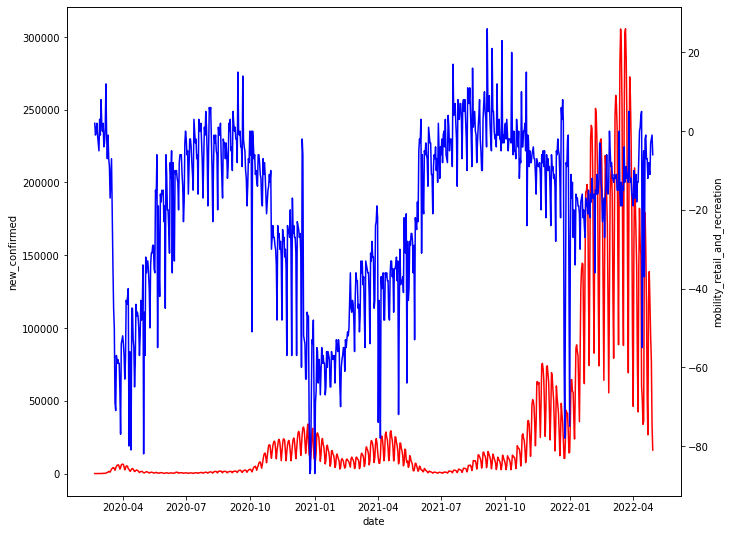

In [24]:
plt.figure(figsize=(11,9))
sns.lineplot(x='date', y='new_confirmed', data=google_covid_de, color='r')
ax2 = plt.twinx()
sns.lineplot(x='date', y='mobility_retail_and_recreation', data=google_covid_de, color='b', ax=ax2)
# sns.lineplot(x='date', y='mobility_residential', data=google_covid_de, color='b', ax=ax2)
